# Kmeans as a preprocessing step for dimensionality reduction

In [1]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [2]:
X,y = datasets.load_digits(return_X_y=True)
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

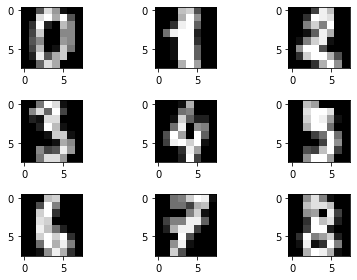

In [3]:
#plot digits
for i in range(9):
    plt.subplot(330+1+i)
    plt.tight_layout()
    plt.imshow(X[i].reshape(8,8), cmap='gray')

In [4]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

## Logistic regression for classification - MNIST dataset

In [5]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9422222222222222

## With Kmeans clustering as a preprocessing step for dimensionality reduction

In [6]:
pipeline = Pipeline([
    ('kmeans',KMeans(n_clusters=78,random_state=42)),
    ('log_reg',LogisticRegression(random_state=42))
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9711111111111111

In [7]:
param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline,param_grid,cv=3,verbose=2)
#uncomment and execute, may take some time
#grid_clf.fit(X_train,y_train)
#grid_clf.best_params_ #found to be 78
#grid_clf.score(X_test,y_test)